### Setup and Dataset Loading

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

# Display the first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploratory Data Analysis (EDA)

In [2]:
# Dataset Information
df.info()  # Overview of dataset structure
print("\nDataset Shape:", df.shape)  # Number of rows and columns

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe()  # Summary of numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


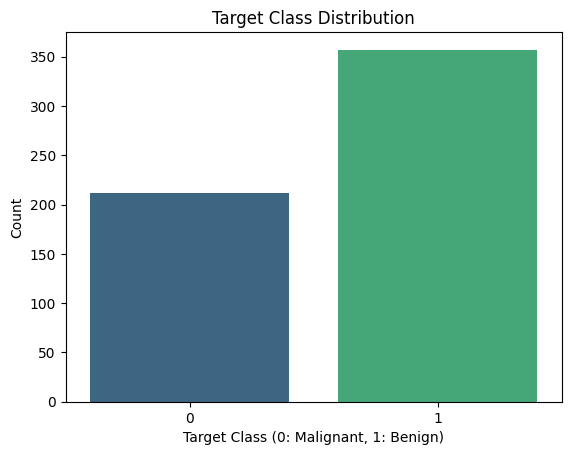

Counts for each target class:
target
1    357
0    212
Name: count, dtype: int64


In [3]:
# Distribution of target variable
target_column = 'target'
sns.countplot(x=target_column, data=df, hue=target_column, palette='viridis', legend=False)
plt.title('Target Class Distribution')
plt.xlabel('Target Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

# Print counts for each class
target_counts = df[target_column].value_counts()
print("Counts for each target class:")
print(target_counts)

Separate features and target

In [4]:
# Feature and target split
X = df.drop(columns=[target_column])
y = df[target_column]

# Print column names of features (X) and target (y)
print("Feature columns (X):", X.columns.tolist())
print("Target column (y):", y.name)

Feature columns (X): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target column (y): target


### Split the data into train and test sets

In [5]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shapes of the resulting datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (455, 30)
Testing set size: (114, 30)


### Apply StandardScaler (only fit on training data)

In [6]:
# Set up the StandardScaler to normalize the features
scaler = StandardScaler()

# Fit the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### Feature selection using SelectKBest

In [7]:
# Apply SelectKBest for feature selection (on the scaled training data)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features based on ANOVA F-test
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform the test set using the same feature selection
X_test_selected = selector.transform(X_test_scaled)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


### ANN Model Setup and Hyperparameter Tuning

In [8]:
# Define the MLPClassifier (Artificial Neural Network)
ann_model = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Different layer sizes
    'activation': ['relu', 'tanh'],                         # Activation functions
    'solver': ['adam', 'sgd'],                              # Solvers
    'alpha': [0.0001, 0.001, 0.01],                         # Regularization parameter
    'learning_rate': ['constant', 'adaptive']               # 
}

### Grid Search for Best Model Parameters

In [9]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters found
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Get the best model from grid search
gcv_best_model = grid_search.best_estimator_

# Predictions for training data
y_pred_train = gcv_best_model.predict(X_train_selected)

# Predictions for testing data
y_pred_test = gcv_best_model.predict(X_test_selected)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.9648


### Save the best model, scaler and feature selector

In [10]:
import pickle

# Save the model
with open('gcv_best_model.pkl', 'wb') as file:
    pickle.dump(gcv_best_model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the feature selector
with open('selector.pkl', 'wb') as file:
    pickle.dump(selector, file)

### Evaluate the model

In [11]:
# Training performance metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Testing performance metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print metrics for the best model
print("\nPerformance Metrics for Best Model:")
print("=" * 50)
print("Performance Metrics on train data")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Accuracy Score:", train_accuracy)
print("Precision Score:", train_precision)
print("Recall Score:", train_recall)
print("F1 Score:", train_f1)
print()
print("=" * 50)
print("Performance Metrics on test data")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Accuracy Score:", test_accuracy)
print("Precision Score:", test_precision)
print("Recall Score:", test_recall)
print("F1 Score:", test_f1)
print("=" * 50)



Performance Metrics for Best Model:
Performance Metrics on train data
Confusion Matrix:
 [[159  10]
 [  3 283]]
Accuracy Score: 0.9714285714285714
Precision Score: 0.9658703071672355
Recall Score: 0.9895104895104895
F1 Score: 0.9775474956822107

Performance Metrics on test data
Confusion Matrix:
 [[42  1]
 [ 1 70]]
Accuracy Score: 0.9824561403508771
Precision Score: 0.9859154929577465
Recall Score: 0.9859154929577465
F1 Score: 0.9859154929577465


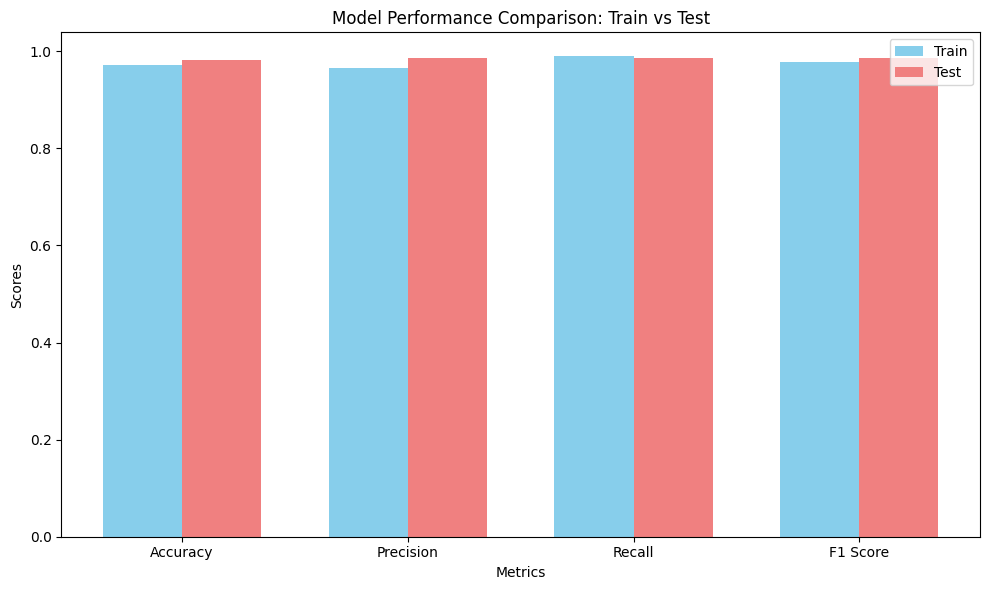

In [12]:
# Define the metrics for train and test data
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the performance comparison
x = np.arange(len(metrics_labels))  # x positions for the metrics
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for training and testing data
ax.bar(x - width/2, train_metrics, width, label='Train', color='skyblue')
ax.bar(x + width/2, test_metrics, width, label='Test', color='lightcoral')

# Labeling the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()